In [133]:
import requests
import json
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

#extract dividend data
response = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=aapl&outputsize=full&apikey=GZZHIBO1SGTLPGB1')
data = response.text
parsed = json.loads(data)
tsdata = parsed['Time Series (Daily)']
tsda = pd.DataFrame.from_dict(tsdata, orient='index')
tsda_new=tsda.loc[:'2009-01-02',]

In [145]:
#extracting dividends
dividend=tsda_new.drop(['1. open','2. high','3. low','5. adjusted close','6. volume','8. split coefficient'],1)
dividend.index = pd.to_datetime(dividend.index)
dividend.rename(columns={"4. close":"price","7. dividend amount":"adjusted_dividend"},inplace=True)
#cleaning of dividend data with stock split data
dividend.adjusted_dividend = pd.to_numeric(dividend.adjusted_dividend)
dividend.price = pd.to_numeric(dividend.price)
#remove zeroes
indexNames = dividend[ dividend['adjusted_dividend'] == 0 ].index
dividend.drop(indexNames , inplace=True)
#account for stock split
dividend_before_2020=dividend.loc['2020-08-07':,]
dividend_before_2020=(dividend_before_2020)/4
dividend_before_2014=dividend_before_2020.loc['2014-05-08':,]
dividend_before_2014=dividend_before_2014/7
dividend.update(dividend_before_2020)
dividend.update(dividend_before_2014)
dividend['dividend yield'] = dividend['adjusted_dividend']/dividend['price']*100
print(dividend)

                 price  adjusted_dividend  dividend yield
2021-02-05  136.760000           0.205000        0.149898
2020-11-06  118.690000           0.205000        0.172719
2020-08-07  111.112500           0.205000        0.184498
2020-05-08   77.532500           0.205000        0.264405
2020-02-07   80.007500           0.192500        0.240602
2019-11-07   64.857500           0.192500        0.296805
2019-08-09   50.247500           0.192500        0.383104
2019-05-10   49.295000           0.192500        0.390506
2019-02-08   42.602500           0.182500        0.428379
2018-11-08   52.122500           0.182500        0.350137
2018-08-10   51.882500           0.182500        0.351756
2018-05-11   47.147500           0.182500        0.387083
2018-02-09   39.102500           0.157500        0.402788
2017-11-10   43.667500           0.157500        0.360680
2017-08-10   38.830000           0.157500        0.405614
2017-05-11   38.487500           0.157500        0.409224
2017-02-09   3

Text(0.5, 1.0, 'Adjusted Dividend')

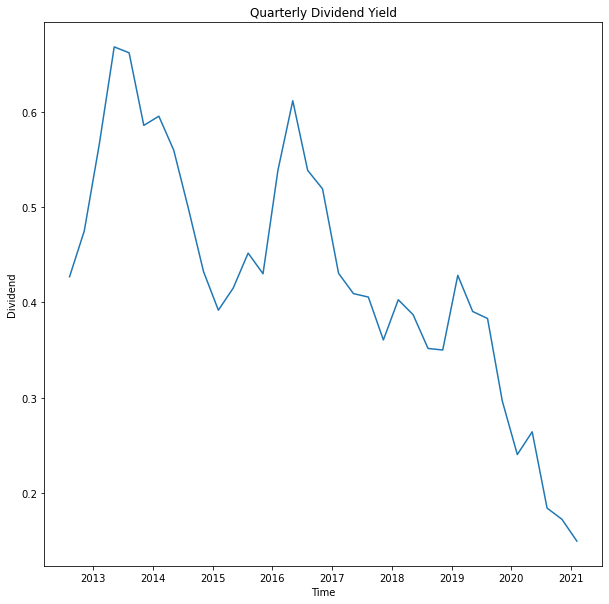

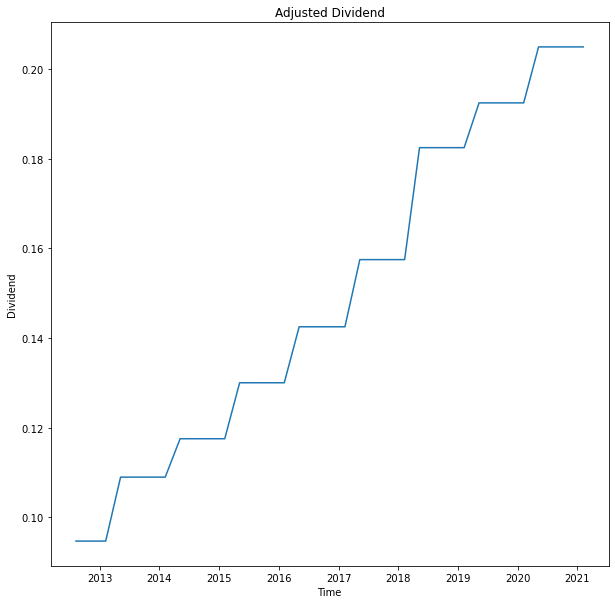

In [147]:
plt.figure(figsize=(10,10))
plt.plot(dividend.index, dividend['dividend yield'])
plt.xlabel("Time")
plt.ylabel("Dividend")
plt.title("Quarterly Dividend Yield")

plt.figure(figsize=(10,10))
plt.plot(dividend.index, dividend['adjusted_dividend'])
plt.xlabel("Time")
plt.ylabel("Dividend")
plt.title("Adjusted Dividend")

In [135]:
#extract interest rates
interest=pd.read_csv('FEDFUNDS.csv',index_col=0)
interest.index = pd.to_datetime(interest.index)

Text(0.5, 1.0, 'Fed Interest Rates from 2009-2021')

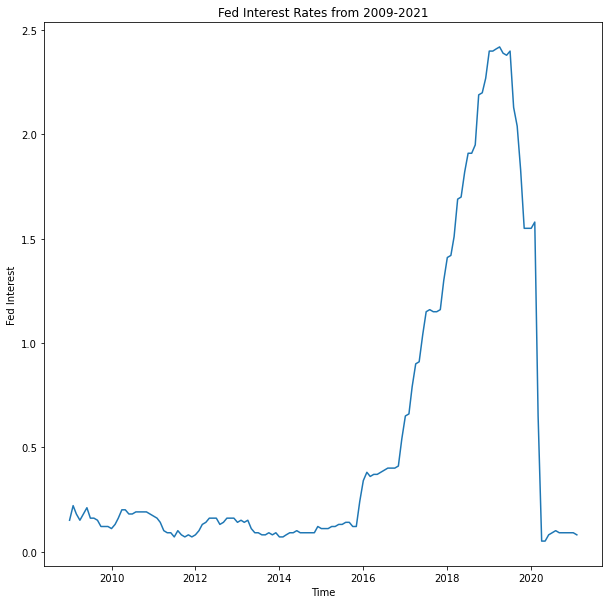

In [141]:
plt.figure(figsize=(10,10))
plt.plot(interest.index, interest['FEDFUNDS'])
plt.xlabel("Time")
plt.ylabel("Fed Interest")
plt.title("Fed Interest Rates from 2009-2021")

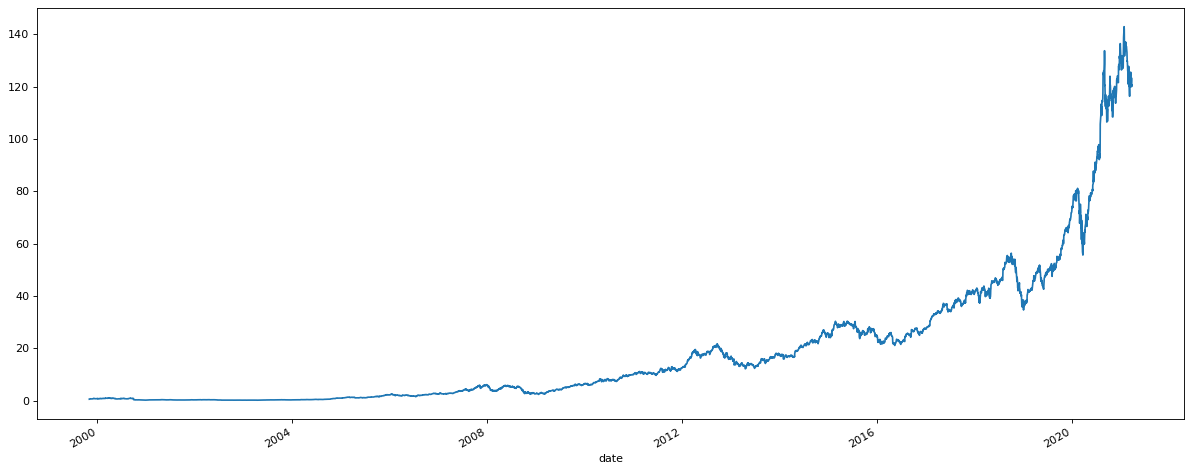

In [148]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

key='GZZHIBO1SGTLPGB1'
ts = TimeSeries(key, output_format='pandas')
ti = TechIndicators(key)

aapl_data, aapl_meta_data = ts.get_daily_adjusted(symbol='AAPL',outputsize='full')
aapl_sma,aapl_metadata_sma = ti.get_sma(symbol='AAPL')

figure (num=None, figsize=(15,6), dpi=80)
aapl_data['5. adjusted close'].plot()
plt.tight_layout()
plt.grid
plt.show()

In [137]:
aapl_time=aapl_data.loc[:'2009-01-02',];
aapl_dividend=aapl_time.drop(['1. open','2. high','3. low','4. close','5. adjusted close','6. volume'],1)
aapl_dividend.rename(columns={"7. dividend amount":"dividend","8. split coefficient":"split"},inplace=True)
indexNames = aapl_dividend[ (aapl_dividend['dividend'] == 0) & (aapl_dividend['split'] == 1.0) ].index
aapl_dividend.drop(indexNames , inplace=True)
aapl_dividend


,dividend,split
date,,
2021-02-05,0.205,1.000000
2020-11-06,0.205,1.000000
2020-08-31,0.000,4.000000
2020-08-07,0.820,1.000000
2020-05-08,0.820,1.000000
2020-02-07,0.770,1.000000
2019-11-07,0.770,1.000000
2019-08-09,0.770,1.000000
2019-05-10,0.770,1.000000
